In [1]:
pip install scipy

In [3]:
pip install "scipy==1.1.0"

In [4]:
pip install pytesseract

  Created wheel for pytesseract: filename=pytesseract-0.3.6-py2.py3-none-any.whl size=13629 sha256=fe41cf00de20b2968fc80b204ee0823aea87e43b05cd6293c180d2a07e8ededf
  Stored in directory: /root/.cache/pip/wheels/ee/71/72/b98430261d849ae631e283dfc7ccb456a3fb2ed2205714b63f
Successfully built pytesseract


In [5]:

from scipy.misc.pilutil import imread
from pytesseract import  image_to_string
from PIL import Image,ImageFile
import os
from tqdm import tqdm
from IPython.display import display # to display images
ImageFile.LOAD_TRUNCATED_IMAGES = True
import re
import pickle
import dateutil.parser as dparser
import hashlib
from scipy.misc import imread, imresize, imshow
import matplotlib.pyplot as plt
%matplotlib inline

In [8]:
from google.colab import files
uploaded = files.upload()

Saving Receipts-20191112T102352Z-001.zip to Receipts-20191112T102352Z-001.zip


In [17]:
import zipfile
import io
Receipts = zipfile.ZipFile(io.BytesIO(uploaded['Receipts-20191112T102352Z-001.zip']), 'r')
Receipts.extractall()

In [18]:
Receipts.printdir()

File Name                                             Modified             Size
Receipts/18e9efcf.jpeg                         2019-11-04 22:27:38        75872
Receipts/deedf037.jpeg                         2019-11-04 22:27:40        54541
Receipts/d50224be.jpeg                         2019-11-04 22:27:46       173046
Receipts/5d63f1a2.jpeg                         2019-11-04 22:27:38        83159
Receipts/44373191.jpeg                         2019-11-04 22:27:44        63109
Receipts/9585fb50.jpeg                         2019-11-04 22:27:32       100449
Receipts/bb958b7f.jpeg                         2019-11-04 22:27:46        84775
Receipts/0a8a955f.jpeg                         2019-11-04 22:27:38        46354
Receipts/6dbdd84b.jpeg                         2019-11-04 22:27:32        54678
Receipts/70edf5c1.jpeg                         2019-11-04 22:27:40        84686
Receipts/9f6518d2.jpeg                         2019-11-04 22:27:46       100452
Receipts/19aa65d3.jpeg                  

In [19]:
import cv2 
import os 
import numpy as np 
from random import shuffle 
from tqdm import tqdm 

In [20]:
Receipts_DIR = Receipts

print(Receipts_DIR)

<zipfile.ZipFile file=<_io.BytesIO object at 0x7f42b233ebf8> mode='r'>


In [21]:

#change the directory path to the folder containing  receipt images
os.chdir('./Receipts')
os.getcwd()

'/content/Receipts/Receipts'

In [22]:
def file_hash(filepath):
    with open(filepath, 'rb') as f:
        return md5(f.read()).hexdigest()

In [23]:
duplicates = []
hash_keys = dict()
for index, filename in  enumerate(os.listdir('.')):  #listdir('.') = current directory
    if os.path.isfile(filename):
        with open(filename, 'rb') as f:
            filehash = hashlib.md5(f.read()).hexdigest()
        if filehash not in hash_keys: 
            hash_keys[filehash] = index
        else:
            duplicates.append((index,hash_keys[filehash]))

In [24]:
duplicates


[(142, 30), (452, 287), (488, 474), (517, 187), (523, 228), (547, 228)]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  


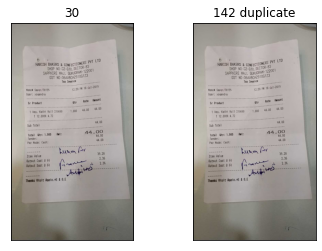

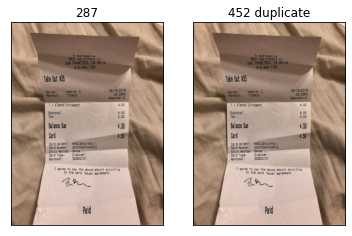

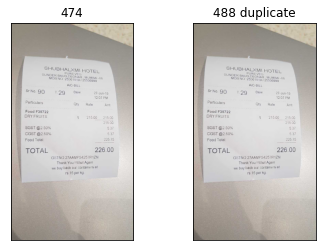

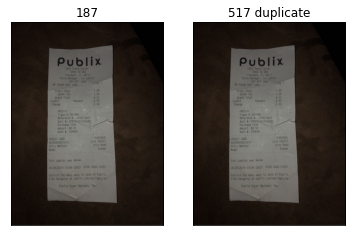

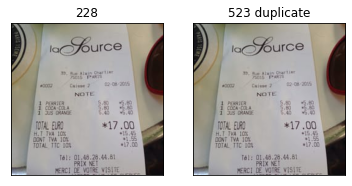

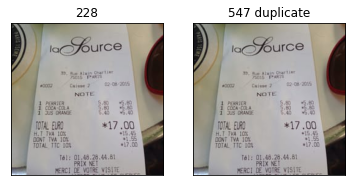

In [25]:
files_list = os.listdir()
for file_indexes in duplicates[:30]:
    try:
    
        plt.subplot(121),plt.imshow(imread(files_list[file_indexes[1]]))
        plt.title(file_indexes[1]), plt.xticks([]), plt.yticks([])

        plt.subplot(122),plt.imshow(imread(files_list[file_indexes[0]]))
        plt.title(str(file_indexes[0]) + ' duplicate'), plt.xticks([]), plt.yticks([])
        plt.show()
    
    except OSError as e:
        continue

In [26]:
for index in tqdm(duplicates):
    os.remove(files_list[index[0]])

100%|██████████| 6/6 [00:00<00:00, 3629.34it/s]


In [27]:

receipts = os.listdir('.') #folder path
print(receipts)

['d330054e.jpeg', 'ae94e526.jpeg', '5b6ee5a0.jpeg', 'a72f96ca.jpeg', '3deff9fb.jpeg', '997ba80b.jpeg', '406d482f.jpeg', '826bb4b1.jpeg', '8185e1b8.jpeg', '26738bde.jpeg', 'a5952274.jpeg', '9fc011f7.jpeg', '904efee7.jpeg', '2c500858.jpeg', '10e00c18.jpeg', 'c7643735.jpeg', '332c05ec.jpeg', '66e32579.jpeg', '83c9db9a.jpeg', '1e288e8c.jpeg', '95ec3eab.jpeg', '7383041e.jpeg', 'a4aee2d5.jpeg', 'ad2814be.jpeg', '068ea6e6.jpeg', 'a8c6b02c.jpeg', 'c89a5476.jpeg', 'd5beec92.jpeg', '5d80cb45.jpeg', 'd65531e1.jpeg', '96de25e8.jpeg', '6878de95.jpeg', '6bba9c45.jpeg', '62b3d78b.jpeg', '4883a482.jpeg', '74c2c549.jpeg', '316d4f06.jpeg', 'fae4ae81.jpeg', 'e1363e44.jpeg', '8e5f8da4.jpeg', '651f5503.jpeg', '7ba45680.jpeg', 'ec8f6e40.jpeg', '618ce259.jpeg', 'bdc0019f.jpeg', '4754f9e3.jpeg', '90733c0d.jpeg', '84dce936.jpeg', 'c70f7dac.jpeg', 'd464ba5d.jpeg', '268027de.jpeg', '991302fd.jpeg', '223eba39.jpeg', '4dddf1eb.jpeg', 'a17d8c2f.jpeg', '6c447c78.jpeg', '5ff14463.jpeg', 'e8dfe984.jpeg', '80b2a0d5.jpe

In [28]:
pip install pytesseract

In [29]:
pip install tesseract


     |████████████████████████████████| 45.6MB 98kB/s 
  Created wheel for tesseract: filename=tesseract-0.1.3-cp36-none-any.whl size=45562572 sha256=2eee9d9cecd40c14fcca9c226df5edd87303be701eb68eb2c704184a29745af1
  Stored in directory: /root/.cache/pip/wheels/82/1f/d9/24797b123379e4ea9511cf660835468b62dad609634cad2aba
Successfully built tesseract


In [30]:
from PIL import Image
from pytesseract import image_to_string


In [31]:
!sudo apt install tesseract-ocr
!pip install pytesseract

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 3 newly installed, 0 to remove and 11 not upgraded.
Need to get 4,795 kB of archives.
After this operation, 15.8 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr-eng all 4.00~git24-0e00fe6-1.2 [1,588 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr-osd all 4.00~git24-0e00fe6-1.2 [2,989 kB]
Get:3 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr amd64 4.00~git2288-10f4998a-2 [218 kB]
Fetched 4,795 kB in 1s (4,625 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl

In [32]:
import pytesseract
import shutil
import os
import random
try:
 from PIL import Image
except ImportError:
 import Image

In [33]:
all_text = []
for i in tqdm(receipts):
    img = Image.open(i)

100%|██████████| 589/589 [00:00<00:00, 3914.74it/s]


In [35]:
import pytesseract
from PIL import ImageEnhance, ImageFilter, Image

In [36]:
# Imports here
import pandas as pd
import numpy as np

import torch
from torch import nn
from torchvision import datasets, transforms, models
import torchvision.models as models
import torch.nn.functional as F
import torchvision.transforms.functional as F
from torch import optim
import json

from collections import OrderedDict
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from PIL import Image


In [37]:
# import the following libraries 
# will convert the image to text string 
import pytesseract       
  
# adds image processing capabilities 
from PIL import Image     
  


In [39]:
import pytesseract
import shutil
import os
import random
try:
 from PIL import Image
except ImportError:
 import Image

In [46]:
pytesseract.pytesseract.tesseract_cmd = (
    r'/usr/bin/tesseract'
)

In [48]:
all_text = []
for i in tqdm(receipts):
    img = Image.open(i)
    
    txt = image_to_string(img)
    all_text.append(txt.lower())
    
## save all the converted text into a text file using pickle
with open("all_text.txt", "wb") as f:   #Pickling
    pickle.dump(all_text, f)

100%|██████████| 589/589 [10:57<00:00,  1.12s/it]


In [49]:
#run this directly if you don't want to convert the images into text

with open("all_text.txt", "rb") as f:   # Unpickling
    all_text = pickle.load(f)

In [50]:
print('number of images after deleting duplicates:',len(all_text))

number of images after deleting duplicates: 589


In [51]:
all_states = ['al','ak','az','ar','ca','co','ct','dc','de','fl','ga','hi','id',
          'il','in','ia','ks','ky','la','me','md','ma','mi','mn','ms','mo',
          'mt','ne','nv','nh','nj','nm','ny','nc','nd','oh','ok','or','pa',
          'ri','sc','sd','tn','tx','ut','vt','va','wa','wv','wi','wy']
#state codes of all US states

In [52]:
print('number of states in the US:',len(all_states))

number of states in the US: 51


In [ ]:
# If date is present:
# {“date”: “YYYY-MM-DD”}
# If date is not present:
# {“date”: null}

In [55]:
def find_if_us(string):
    matches = 0
    allTexts = string.split("\n")
    for entry in allTexts:
        
        storedMatches = []
    
    #for each entry:
        allWords = entry.split(' ')
        for words in allWords:

        #remove punctuation that will interfere with matching
            words = words.replace(',', '')
            words = words.replace('.', '')
            words = words.replace(';', '')


        #if a keyword match is found, store the result.
            if words in all_states:
                if words in storedMatches:
                    continue
                else:
                    storedMatches.append(words)
                
                matches += 1
        
        #if there is a match
        if matches == 0:
            us_state = False
            
        
        
        else:
          us_state = True
            
    return(us_state)

In [56]:
#Finding any characters that might indicate the presence of date in the text

def get_date(string,country):  #country=True ==>US 
    
    if(string==0):
        date = 0
    
    else:
        search = []
        for i in string:
            if(i.isalnum()==True or i=='/' or i =='-'):
                search.append(i)    

        search = "".join(search)
        #return location_based(search,country)
        if country == True:         #country True indicating that it's the US
            try:
                date = dparser.parse(search,fuzzy=True).timetuple()
                date = str(date[0])+"-"+"{0:0=2d}".format(date[1])+"-"+"{0:0=2d}".format(date[2])

            except:
                try:
                    date = dparser.parse(search,fuzzy=True, dayfirst=True)
                    date = str(date[0])+"-"+"{0:0=2d}".format(date[1])+"-"+"{0:0=2d}".format(date[2])
                except:    
                    date = 0
        if country == False:
            try:

                date = dparser.parse(search,fuzzy=True, dayfirst=True)
                date = str(date[0])+"-"+"{0:0=2d}".format(date[1])+"-"+"{0:0=2d}".format(date[2])

            except:
                date = 0
    
    return date

In [57]:
#Using some heuristics here to capture all the date formats that may be found in the text
def heur(string,country):
    

    d1 = re.findall(r"[\d]{1,2}/[\d]{1,2}/[\d]{4}", string)    #12/12/2019
    d2 = re.findall(r"[\d]{1,2}-[\d]{1,2}-[\d]{2}", string)    #12-12-19
    d3 = re.findall(r"(\d{1,2} (?:jan|feb|mar|apr|may|jun|jul|aug|sept|oct|nov|dec) \d{4})", string) #5 mar 2018  
    d4 = re.findall(r"[\d]{1,2}-[\d]{1,2}-[\d]{4}", string)  #02-10-2018
    d5 = re.findall(r"[\d]{4}-[\d]{1,2}-[\d]{1,2}", string)  #2018-10-05
    d6 = re.findall(r"[\d]{1,2}/[\d]{1,2}/[\d]{2}", string)  #05/01/2018
    
    date = max(d1,d2,d3,d4,d5,d6)
    
    
    if date!=[]:
        if(len(date)>1):
            del date[-1]
        date = ''.join(date)
#         return location_based(date,country)
        if(country == True):
            try:
                
                date = dparser.parse(date,fuzzy=True).timetuple()
                date = str(date[0])+"-"+"{0:0=2d}".format(date[1])+"-"+"{0:0=2d}".format(date[2])
            except:
                try:
                    date = dparser.parse(date,fuzzy=True,dayfirst=True).timetuple()
                    date = str(date[0])+"-"+"{0:0=2d}".format(date[1])+"-"+"{0:0=2d}".format(date[2])
                except:
                    date = 0
                    
        if(country == False):
            try:
                
                date = dparser.parse(date,fuzzy=True,dayfirst=True).timetuple()
                date = str(date[0])+"-"+"{0:0=2d}".format(date[1])+"-"+"{0:0=2d}".format(date[2])
            except:
              date = 0
            
    else:
        date = 0
    return date

In [58]:
def to_find(string):
    #searching for comma,slash,dot,hyphen or anything that might indicate the presence of a date
    
        
    try:
            
        ix = [m.start() for m in re.finditer(r'{}'.format(re.escape("/")), string)][-1]
        
        
        
        
    except:
        try:
            
            ix = [m.start() for m in re.finditer(r'{}'.format(re.escape(".")), string)][-1]
            
            
        except:
            try:
                
                ix = [m.start() for m in re.finditer(r'{}'.format(re.escape("'")), string)][-1]
            except:
                try:
                    
                    ix = [m.start() for m in re.finditer(r'{}'.format(re.escape(",")), string)][-1]
                except:
                    try:
                        ix = [m.start() for m in re.finditer(r'{}'.format(re.escape("-")), string)][-1]
                        
                    except:
                        
                        ix = 0
               
                
    return ix

In [60]:
#find if the keyword date is present in a text and extract the date in that specific format
def found_date(string,country):

    dix = string.find('date')
    q = string[dix:dix+23]
    q = re.sub('[:\n|&?,‘]', ' ', q)
    
    try:
        if(country == False):   
            
            date = dparser.parse(q,fuzzy=True,dayfirst=True).timetuple()
        if(country == True):
            date = dparser.parse(q,fuzzy=True).timetuple()
            
        date = str(date[0])+"-"+"{0:0=2d}".format(date[1])+"-"+"{0:0=2d}".format(date[2])
    except:
        try:

            if(q[to_find(q)+3]!= ' '):
                z = q[0:to_find(q)+6]
                if(country==False):
                    
                    date = dparser.parse(z,fuzzy=True,dayfirst=True).timetuple()
                if(country == True):
                    date = dparser.parse(z,fuzzy=True).timetuple()
                
                date = str(date[0])+"-"+"{0:0=2d}".format(date[1])+"-"+"{0:0=2d}".format(date[2])

            else:
                z = q[0:to_find(q)+3]
                if(country==False):
                    date = dparser.parse(z,fuzzy=True,dayfirst=True).timetuple()
                if(country == True):
                    date = dparser.parse(z,fuzzy=True).timetuple()
                
                date = str(date[0])+"-"+"{0:0=2d}".format(date[1])+"-"+"{0:0=2d}".format(date[2])

        except:
            date = 0
    
        
        
    return date

In [61]:
#Check is the dictionary we're using to store the dates that we found using some heuristics as mentioned above
check = {}
for i in tqdm(range(len(all_text))):        
    
    if((find_if_us(all_text[i])==True) or '$' in all_text[i]):
        check[i] = [True]
        
    else:
        check[i] = [False]
    
    check[i].append(get_date(all_text[i],check[i][0]))
    
    check[i].append(heur(all_text[i],check[i][0]))

    check[i].append(found_date(all_text[i],check[i][0]))

100%|██████████| 589/589 [00:00<00:00, 1424.38it/s]


In [62]:
#first 10 elements of check
list(check.items())[0:10]

[(0, [True, 0, '1978-05-19', 0]),
 (1, [True, 0, '2019-06-12', 0]),
 (2, [True, 0, '2020-12-29', 0]),
 (3, [False, 0, 0, 0]),
 (4, [False, 0, '2019-05-31', 0]),
 (5, [True, 0, 0, 0]),
 (6, [True, 0, 0, 0]),
 (7, [True, 0, '2019-06-27', '2019-06-27']),
 (8, [False, 0, 0, 0]),
 (9, [True, 0, 0, 0])]

In [ ]:
#The boolean values in the dictionary check denotes the following:
#True ==> Receipt is from US
#False ==> Not from US
#This was found using some heuristics in the converted text.

In [63]:
#Removed those elements in check which had no date and saved only those elements with date in a new list 'found_some_date'
#
#found some date (regadless of whether they're right or not)
found_some_date = [j for i,j in enumerate(check.items())if( check[i][1] !=0 or check[i][2] !=0  or check[i][3] != 0 )]
perc = len(found_some_date)/589*100
print('found some dates from receipts:',len(found_some_date),'out of',len(all_text),'\n(correct and incorrect dates)','\n\nin percentage',perc,'%')
#percentage of predicted dates

found some dates from receipts: 260 out of 589 
(correct and incorrect dates) 

in percentage 44.14261460101868 %


In [65]:
response_date = {}
for i in range(len(check.values())):
    if(len([num for num in check[i] if (num and type(num)!=bool)])!=0):
        response_date[i] = {"date: " +str([num for num in check[i] if (num and type(num)!=bool)][0])}
    else:
        response_date[i] = {None}

In [66]:
response_date

{0: {'date: 1978-05-19'},
 1: {'date: 2019-06-12'},
 2: {'date: 2020-12-29'},
 3: {None},
 4: {'date: 2019-05-31'},
 5: {None},
 6: {None},
 7: {'date: 2019-06-27'},
 8: {None},
 9: {None},
 10: {None},
 11: {None},
 12: {None},
 13: {'date: 2016-05-26'},
 14: {'date: 2019-08-06'},
 15: {None},
 16: {None},
 17: {'date: 2019-07-26'},
 18: {'date: 2019-07-19'},
 19: {None},
 20: {'date: 2019-03-17'},
 21: {'date: 2019-06-06'},
 22: {None},
 23: {None},
 24: {None},
 25: {None},
 26: {None},
 27: {'date: 2020-10-08'},
 28: {'date: 2019-07-16'},
 29: {'date: 2016-12-02'},
 30: {None},
 31: {None},
 32: {'date: 2019-07-18'},
 33: {None},
 34: {'date: 2019-03-09'},
 35: {None},
 36: {None},
 37: {'date: 2019-05-17'},
 38: {'date: 1008-10-31'},
 39: {None},
 40: {None},
 41: {'date: 2017-01-18'},
 42: {'date: 2017-12-22'},
 43: {'date: 2019-04-20'},
 44: {None},
 45: {None},
 46: {'date: 2019-07-19'},
 47: {'date: 2019-05-16'},
 48: {'date: 2019-06-03'},
 49: {'date: 2019-05-27'},
 50: {'dat

In [67]:

# If date is present:
# {“date”: “YYYY-MM-DD”}
# If date is not present:
# {“date”: null}

In [ ]:
#In the real world, the images would be unlabelled for this problem.
#So the accuracy can only be found found by manually looking at each and every receipt.

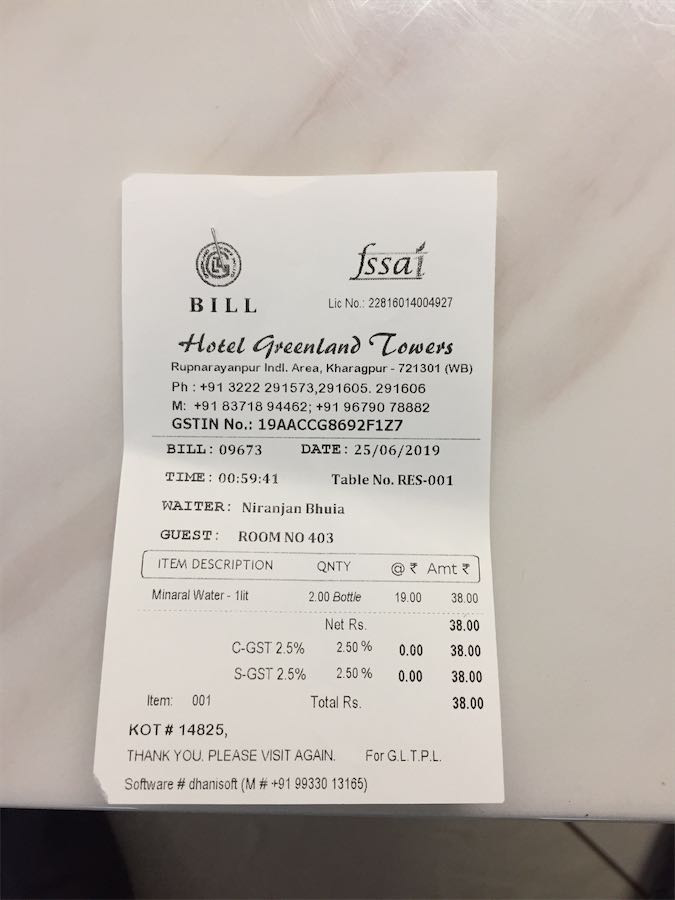

In [68]:
receipts = os.listdir('.')   #folder path containing images of receipts
pil_im = Image.open(receipts[585])
display(pil_im)

In [69]:
#Accuracy¶
#Calculate the accuracy of the service against the sample receipts dataset given. This can be calculated as follows:

#accuracy = (number of receipts for which the service extracted correct date/total receipts)*100%

#Observation and Result
#After going through each and every image, 33% of the dates were found to be correct. (190 out of 589 images). So my accuracy is 33%
#The dataset given for this problem was unlabelled.
#It was tedious to look through each and every image manually to find out if the dates were correct.
#The challenging part was to get the location of the receipt.
#Pytesseract,hashlib and dateutil.parser,PIL,regex and other libraries have been used in this assignment.
#Although pytesseract is one of the state of the art image to text conversion libraries that are out there, I think using a custom ocr model for this problem would do better because we are only interested to find the date in a receipt and not any other form of text.